In [2]:

import csv
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from textstat import syllable_count, flesch_reading_ease, automated_readability_index
import nltk
from sklearn.naive_bayes import GaussianNB

In [3]:
df = pd.read_csv(
    'C:/Hammad Aslam/BS IT (post ADP)/3rd Semester/Capstone Project/Project/backend/practice/graph/csv.csv')
df.dropna(inplace=True)
# df

In [4]:
attributes = ["word_count", "sentence_count",
              "character_count", "fres_score", "ari_score", "votes", "helpful"]
new_df = pd.DataFrame(columns=attributes)

for row in df.itertuples(name='Row'):
    text = row.review_body
    print(text)
    tokens = nltk.word_tokenize(text)
    tokens = [t for t in tokens if t.isalpha() and t.lower(
    ) not in nltk.corpus.stopwords.words('english')]
    text = ' '.join(tokens)
    # Text Metrics Extraction
    word_count = len(tokens)
    sentence_count = len(nltk.sent_tokenize(text))
    # syllable_count = Pyphen().inserted(text).count('-') + 1
    character_count = len(text.replace(' ', ''))
    fres_score = round(abs(flesch_reading_ease(text)))
    ari_score = round(automated_readability_index(text))
    # print(text)
    votes = int(row.review_votes)
    helpful = int(row.review_helpfulness)
    new_row = {
        "word_count": word_count,
        "sentence_count": sentence_count,
        "character_count": character_count,
        "fres_score": fres_score,
        "ari_score": ari_score,
        "votes": votes,
        "helpful": helpful
    }
    new_row_df = pd.DataFrame([new_row], columns=attributes)  # Create a single-row DataFrame
    new_df = pd.concat([new_df, new_row_df], ignore_index=True)
new_df

Too small and doesn't dry  the clothes
I used this to keep hot chocolate warm for a Christmas event outdoor with my kids. It stored easily in a bag cooler, poured easily, & saved money. I might put a cold drink in it for them in the summer when out in the heat.
Got this for my dad who's updating his home before selling. Beautiful design. Easy to install according to my father and younger brother.
This review is for Peerless P2635LF-BN Parkwood Two Handle Lavatory Faucet Centerset, Brushed Nickel The installation was easy. The supply lines are included which helped the installation process a lot, the only struggle was to remove the old one. The nobs operate very smoothly don't require any effort to open or close and it is easy to set up the temperature. It looks really nice. I like the height not too tall or short. The water flow feels low at first but I think it is the best volume to conserve water instead of running it at full speed and wasting a lot of water. The only issue is that i

KeyboardInterrupt: 

In [162]:
X = pd.DataFrame({'word_count': new_df['word_count'],  'character_count': new_df['character_count'], 'fres_score': new_df['fres_score'], 'ari_score': new_df['ari_score'], 'votes': new_df['votes']})

y = pd.DataFrame({'helpful': new_df['helpful']})
X, y

(    word_count character_count fres_score ari_score votes
 0           37             238          9        27    10
 1          104             619         43        59     8
 2           36             200         43        23     0
 3          130             760         69        71     0
 4           44             274          1        30     6
 ..         ...             ...        ...       ...   ...
 494         30             158         58        18     0
 495         42             232         37        26     0
 496         41             229         38        25     0
 497         30             167         33        20     0
 498         80             441         10        44     0
 
 [499 rows x 5 columns],
     helpful
 0         1
 1         1
 2         0
 3         0
 4         1
 ..      ...
 494       0
 495       0
 496       0
 497       0
 498       0
 
 [499 rows x 1 columns])

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [164]:
from sklearn.preprocessing import LabelEncoder

# Assuming y_train contains your sentiment labels as strings
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
# y_train_encoded

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [165]:
# model = RandomForestClassifier(n_estimators=100)
model = RandomForestRegressor(n_estimators=100)
model
# model.fit(X_train, y_train_encoded)
model.fit(X_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [166]:
y_pred = model.predict(X_test)
new = model.predict([[37,238,9,27, 10]])[0]
y_pred.round()
new

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


0.9

In [167]:
# accuracy_score(y_test, y_pred)
r2_score(y_test, y_pred)

0.9708080808080808

In [168]:
NB = GaussianNB()
# NB.fit(X_train, y_train)
X

,word_count,character_count,fres_score,ari_score,votes
0,37,238,9,27,10
1,104,619,43,59,8
2,36,200,43,23,0
3,130,760,69,71,0
4,44,274,1,30,6
...,...,...,...,...,...
494,30,158,58,18,0
495,42,232,37,26,0
496,41,229,38,25,0
497,30,167,33,20,0


In [196]:
# load the iris dataset
# from sklearn.datasets import load_iris
# iris = load_iris()


# # store the feature matrix (X) and response vector (y)
# X = iris.data
# y = iris.target
# print(X)
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
vectorizer = TfidfVectorizer()
new_X = []
new_y = []
for row in y.itertuples(name='Row'):

    new_y.append(row.helpful)
for row in df.itertuples(name='Row'):
    new_X.append(row.review_body)
    # new_X.append([row.word_count, row.character_count, row.fres_score, row.ari_score])
# splitting X and y into training and testing sets
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(
    new_X, new_y, test_size=0.3, random_state=1)
new_X_vector = vectorizer.fit_transform(new_X_train)
new_X_test = vectorizer.transform(new_X_test)

# training the model on training set
gnb = MultinomialNB()
gnb.fit(new_X_vector, new_y_train)
text = ["I bought this Compaq A1500 this week and am more than satisfied with it. Simple installation without any problems, excellent photo quality resolution even on plain paper, very good managing software and the best part is, I didn't need any customer support to make it run :). Very good product with excellent features, quality and resolution. Believe me it's better than the best available in this price range."]
text = vectorizer.transform(text)
# making predictions on the testing set
new_y_pred = gnb.predict(new_X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(new_y_test, new_y_pred)*100)
new_y_pred

Gaussian Naive Bayes model accuracy(in %): 99.33333333333333


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

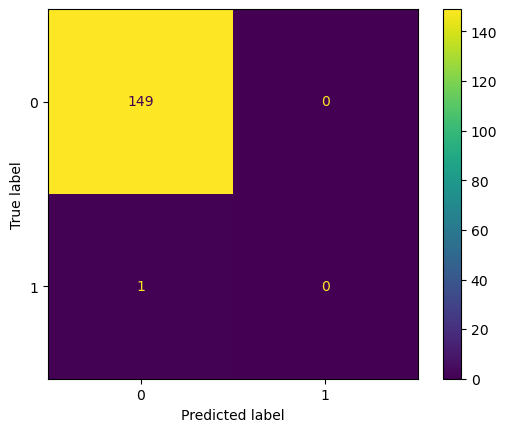

In [199]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
import matplotlib.pyplot as plt
cm = confusion_matrix(new_y_test, new_y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()